## Objectif : déterminer si une personne a l'alzheimer en fonction de certains attributs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('alzheimers_disease_data.csv')

In [3]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [3]:
## Suppression des colonnes inutiles
df.drop(['PatientID','DoctorInCharge'], axis=1, inplace=True)
df.duplicated().sum()

0

In [4]:
## Vérifier les valeurs nulles
df.isna().sum()

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

In [12]:
df.dtypes.value_counts()

int64      21
float64    12
dtype: int64

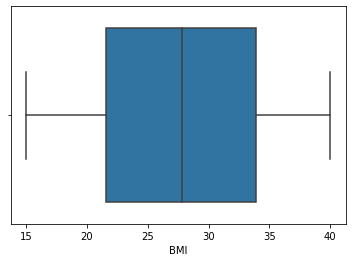

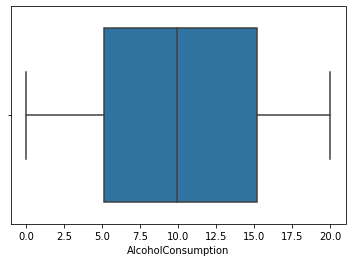

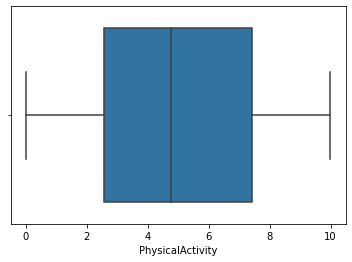

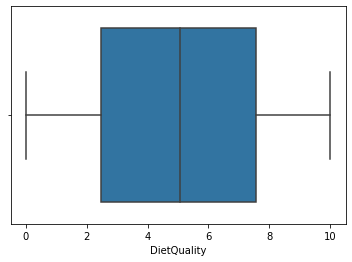

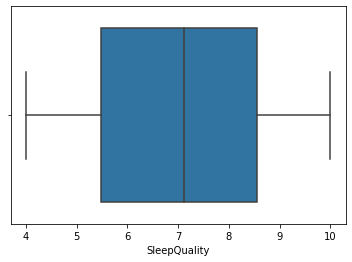

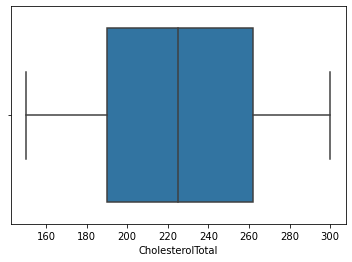

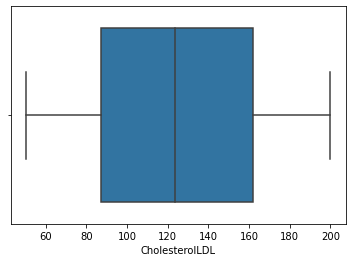

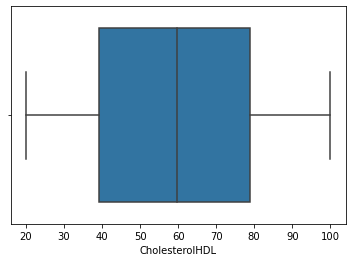

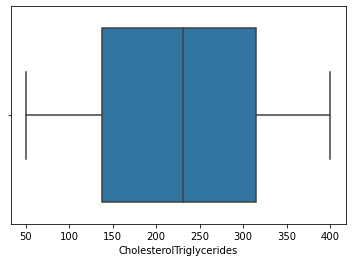

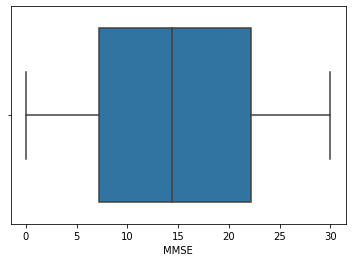

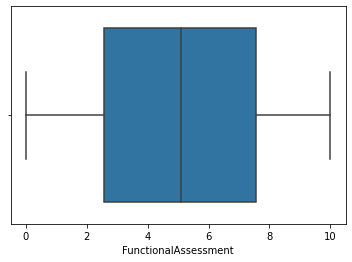

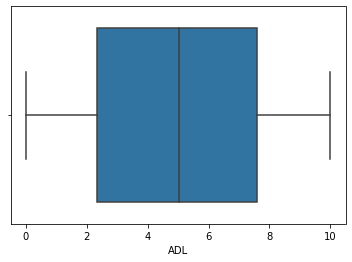

In [6]:
## Vérifier s'il y a des erreurs de format
for col in df.select_dtypes(include='float'):
    plt.figure()
    sns.boxplot(x=col, data=df)

In [10]:
for col in df.select_dtypes(include=['int']):
    print(df[col].value_counts())

88    84
68    84
72    82
76    81
71    80
90    79
67    77
60    74
70    74
66    73
89    72
77    72
78    72
84    71
83    71
62    70
63    69
80    68
61    68
87    68
82    68
73    66
65    64
75    64
69    63
64    59
79    57
85    57
81    57
74    55
86    50
Name: Age, dtype: int64
1    1088
0    1061
Name: Gender, dtype: int64
0    1278
1     454
3     211
2     206
Name: Ethnicity, dtype: int64
1    854
2    636
0    446
3    213
Name: EducationLevel, dtype: int64
0    1529
1     620
Name: Smoking, dtype: int64
0    1607
1     542
Name: FamilyHistoryAlzheimers, dtype: int64
0    1839
1     310
Name: CardiovascularDisease, dtype: int64
0    1825
1     324
Name: Diabetes, dtype: int64
0    1718
1     431
Name: Depression, dtype: int64
0    1950
1     199
Name: HeadInjury, dtype: int64
0    1829
1     320
Name: Hypertension, dtype: int64
155    37
106    34
126    34
130    33
165    33
       ..
115    16
168    15
123    14
167    13
173    11
Name: SystolicBP, Len

C:\Users\myco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


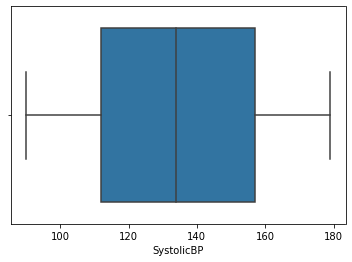

In [15]:
sns.boxplot(df['SystolicBP']);

## Visualisation

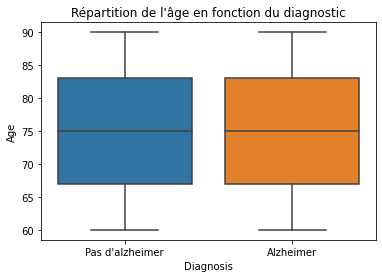

In [17]:
sns.boxplot(y='Age', x='Diagnosis', data=df)
plt.title("Répartition de l'âge en fonction du diagnostic")
plt.xticks(range(2), ["Pas d'alzheimer", "Alzheimer"]);

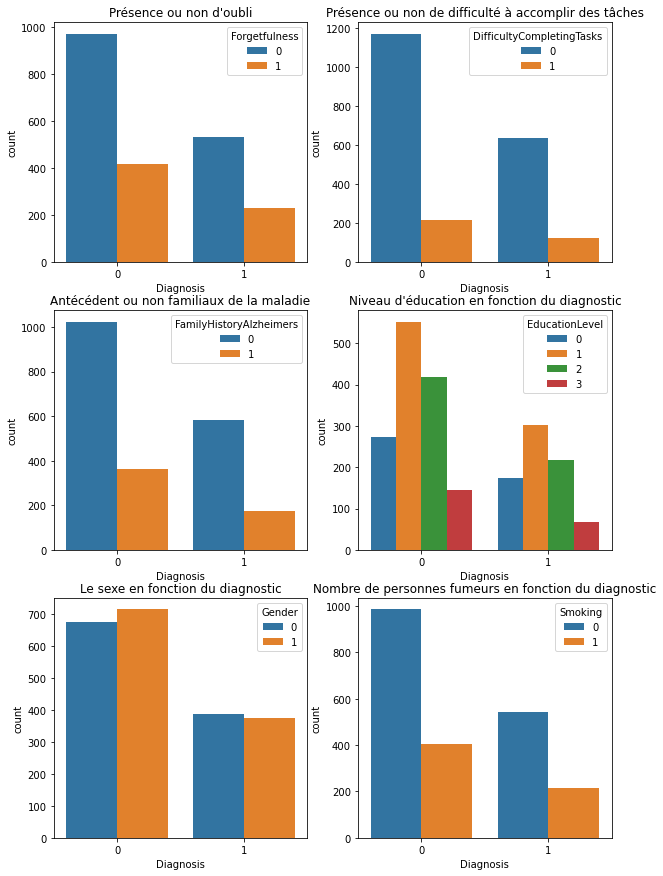

In [25]:
plt.figure(figsize=(10,15))
plt.subplot(321)
sns.countplot(x=df['Diagnosis'], hue=df['Forgetfulness'])
plt.title("Présence ou non d'oubli")
plt.subplot(322)
sns.countplot(x=df['Diagnosis'], hue=df['DifficultyCompletingTasks'])
plt.title('Présence ou non de difficulté à accomplir des tâches')
plt.subplot(323)
sns.countplot(x=df['Diagnosis'], hue=df['FamilyHistoryAlzheimers'])
plt.title("Antécédent ou non familiaux de la maladie")
plt.subplot(324)
sns.countplot(x=df['Diagnosis'], hue=df['EducationLevel'])
plt.title("Niveau d'éducation en fonction du diagnostic")
plt.subplot(325)
sns.countplot(x=df['Diagnosis'], hue=df['Gender'])
plt.title("Le sexe en fonction du diagnostic")
plt.subplot(326)
sns.countplot(x=df['Diagnosis'], hue=df['Smoking'])
plt.title("Nombre de personnes fumeurs en fonction du diagnostic");

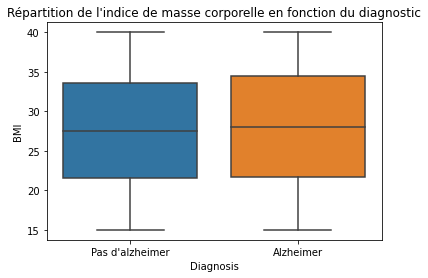

In [27]:
sns.boxplot(x='Diagnosis', y='BMI', data=df)
plt.title("Répartition de l'indice de masse corporelle en fonction du diagnostic")
plt.xticks(range(2), ["Pas d'alzheimer", "Alzheimer"]);

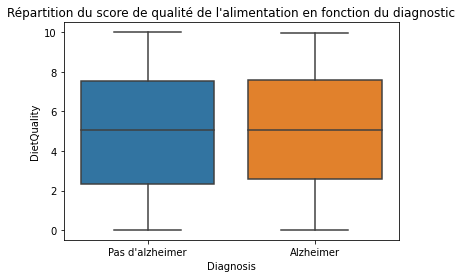

In [29]:
sns.boxplot(x='Diagnosis', y='DietQuality', data=df)
plt.title("Répartition du score de qualité de l'alimentation en fonction du diagnostic")
plt.xticks(range(2), ["Pas d'alzheimer", "Alzheimer"]);

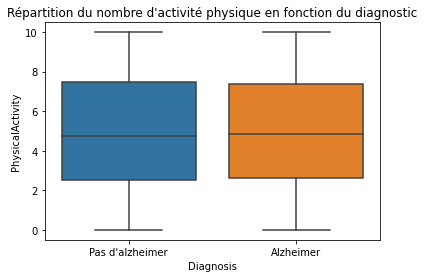

In [28]:
sns.boxplot(x='Diagnosis', y='PhysicalActivity', data=df)
plt.title("Répartition du nombre d'activité physique en fonction du diagnostic")
plt.xticks(range(2), ["Pas d'alzheimer", "Alzheimer"]);

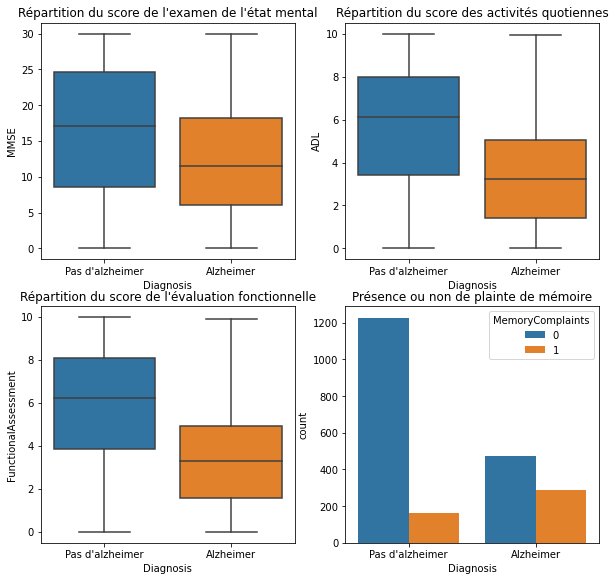

In [100]:
plt.figure(figsize=(10,20))
plt.subplot(421)
sns.boxplot(x=df['Diagnosis'], y=df["MMSE"])
plt.title("Répartition du score de l'examen de l'état mental")
plt.xticks(range(2), ["Pas d'alzheimer", "Alzheimer"])
plt.subplot(422)
sns.boxplot(x=df['Diagnosis'], y=df['ADL'])
plt.title("Répartition du score des activités quotiennes")
plt.xticks(range(2), ["Pas d'alzheimer", "Alzheimer"])
plt.subplot(423)
sns.boxplot(x=df['Diagnosis'], y=df['FunctionalAssessment'])
plt.title("Répartition du score de l'évaluation fonctionnelle")
plt.xticks(range(2), ["Pas d'alzheimer", "Alzheimer"])
plt.subplot(424)
sns.countplot(x=df['Diagnosis'], hue=df['MemoryComplaints'])
plt.title("Présence ou non de plainte de mémoire")
plt.xticks(range(2), ["Pas d'alzheimer", "Alzheimer"]);

In [12]:
pd.set_option('display.max_columns', None)

## Modélisation

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [31]:
## Utilisation d'un get dummies
df_dummies = pd.get_dummies(df, columns=['Ethnicity','EducationLevel'], drop_first=True)

In [32]:
### Normalisation des données
scaler = MinMaxScaler()

df_norm = pd.DataFrame(scaler.fit_transform(df_dummies), columns=df_dummies.columns)

In [33]:
## Séparation des données
X = df_norm.drop('Diagnosis', axis=1)
y = df_norm['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
## Tester plusieurs modèles par validation croisée
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
svc = SVC(random_state=42)
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

models = []
models.append(('lr',lr))
models.append(('knn', knn))
models.append(('svc', svc))
models.append(('rf', rf))
models.append(('dt', dt))
models.append(('xgb', xgb))

In [11]:
results = []
names = []

for name, model in models:
    results.append(cross_val_score(model, X_train, y_train, scoring='f1', cv=10))
    names.append(name) 

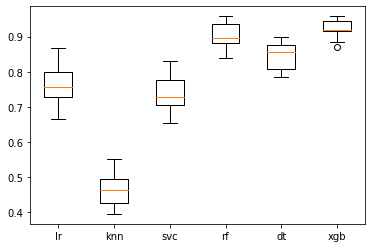

In [12]:
## Afficher les résultats pour chaque modèle
plt.boxplot(results)
plt.xticks(range(1,7), names);

In [36]:
## Afficher le meilleur score avec les meilleurs paramètres pour chaque modèle en utilisant un GridSearch
lr_params = {"C" : [0.1, 1, 10]}
knn_params = {"n_neighbors" : [3, 5, 7]}
svc_params = {"C" : [0.1, 1, 10], "gamma" : [0.1, 1, 'scale', 'auto']}
rf_params = {"n_estimators" : [50, 100, 200], "max_depth" : [3, 5, 7, 12, None]}
dt_params = {"max_depth" : [3, 5, 7, 12, None]}
xgb_params = {"n_estimators" : [50, 100, 200], "learning_rate" : [0.01, 0.1, 1], "max_depth" : [3, 5, 7]}

models_params = []

models_params.append(('lr',lr,lr_params))
models_params.append(('knn', knn, knn_params))
models_params.append(('svc', svc, svc_params))
models_params.append(('rf', rf, rf_params))
models_params.append(('dt', dt, dt_params))
models_params.append(('xgb', xgb, xgb_params))

In [18]:
## Afficher les résultats
results_gridserch = []

for name, model, param in models_params:
    grille = GridSearchCV(model, param, cv=10, scoring='f1')
    grille.fit(X_train, y_train)
    print(name, ' : ', grille.best_score_, grille.best_params_)

lr  :  0.7647573351294072 {'C': 10}
knn  :  0.483016767434931 {'n_neighbors': 3}
svc  :  0.7576507267260129 {'C': 10, 'gamma': 'auto'}
rf  :  0.9045679892433327 {'max_depth': None, 'n_estimators': 100}
dt  :  0.9139719132384417 {'max_depth': 5}
xgb  :  0.9259453429262402 {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}


In [37]:
## Evaluation des deux meilleurs modèles

## (XGBClassifier)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

best_model_xgb = XGBClassifier(random_state=42, learning_rate=0.01, max_depth=5, n_estimators=200)
best_model_xgb.fit(X_train, y_train)

y_pred = best_model_xgb.predict(X_test)
print('##################### XGBClassifier ###########################')
print()
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_pred, y_test))

## Decision Tree

best_model_dt = DecisionTreeClassifier(random_state=42, max_depth=5)
best_model_dt.fit(X_train, y_train)
y_pred_dt = best_model_dt.predict(X_test)
print()
print('##################### DECISION TREE ############################')
print()
print(classification_report(y_test, y_pred_dt))
confusion_matrix(y_pred_dt, y_test)

##################### XGBClassifier ###########################

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       277
         1.0       0.95      0.92      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430

[[270  13]
 [  7 140]]

##################### DECISION TREE ############################

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95       277
         1.0       0.93      0.87      0.90       153

    accuracy                           0.93       430
   macro avg       0.93      0.92      0.92       430
weighted avg       0.93      0.93      0.93       430



array([[267,  20],
       [ 10, 133]], dtype=int64)

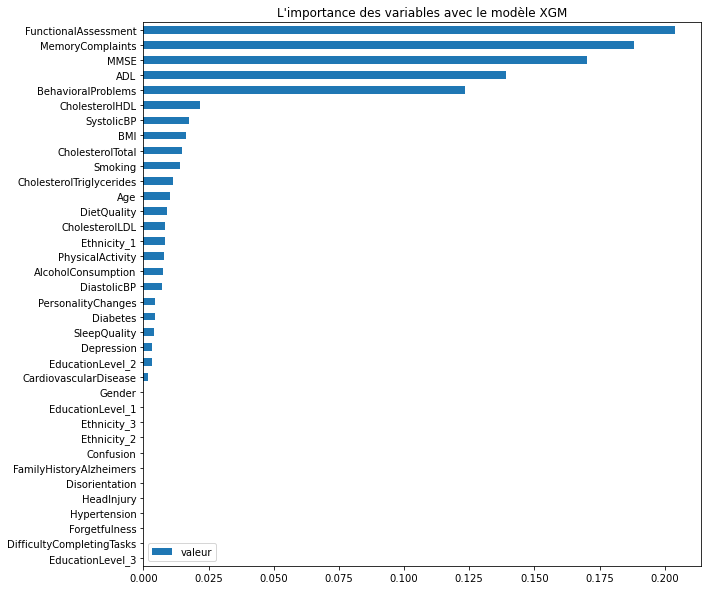

In [62]:
## Estimer la valeur de chaque variable avec le modèle XGM
pd.DataFrame(best_model_xgb.feature_importances_, index=X_train.columns).rename(columns={0:"valeur"})\
.sort_values(by='valeur',ascending=True).plot.barh(figsize=(10,10), title="L'importance des variables avec le modèle XGM");


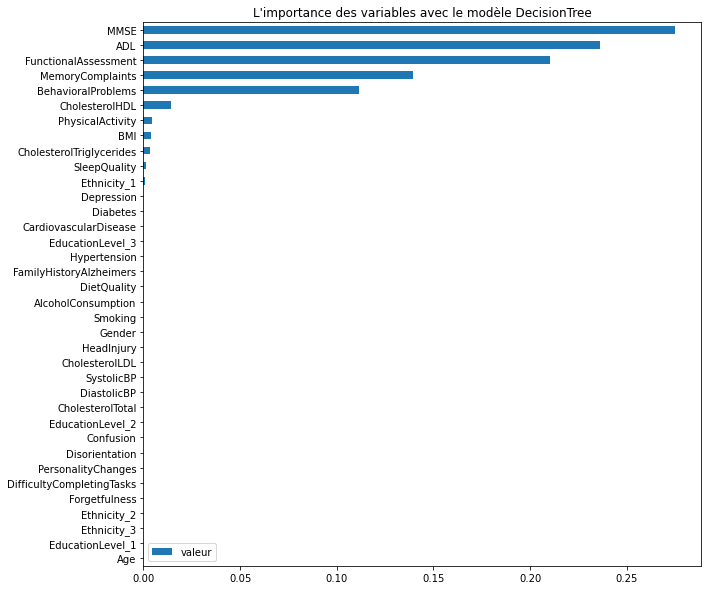

In [64]:
## Estimer la valeur de chaque variable avec le modèle DecisionTree
pd.DataFrame(best_model_dt.feature_importances_, index=X_train.columns).rename(columns={0:"valeur"}).sort_values("valeur")\
.plot.barh(figsize=(10,10), title="L'importance des variables avec le modèle DecisionTree");